In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import plotly.express as px

In [21]:
pokemon = pd.read_csv('pokedex.csv' ,na_values= '?')
pokemon.head()

Nat     Pokemon    HP   Atk   Def    SpA    SpD   Spe  Total Type I Type II  \
0   1   Bulbasaur  45.0  49.0  49.0   65.0   65.0  45.0  318.0  Grass  Poison   
1   2     Ivysaur  60.0  62.0  63.0   80.0   80.0  60.0  405.0  Grass  Poison   
2   3    Venusaur  80.0  82.0  83.0  100.0  100.0  80.0  525.0  Grass  Poison   
3   4  Charmander  39.0  52.0  43.0   60.0   50.0  65.0  309.0   Fire     NaN   
4   5  Charmeleon  58.0  64.0  58.0   80.0   65.0  80.0  405.0   Fire     NaN   

  Ability I Ability II Hidden Ability     EV Worth     Gender Egg Group I  \
0  Overgrow        NaN    Chlorophyll        1 SpA  M (87.5%)     Monster   
1  Overgrow        NaN    Chlorophyll  1 SpA/1 SpD  M (87.5%)     Monster   
2  Overgrow        NaN    Chlorophyll  2 SpA/1 SpD  M (87.5%)     Monster   
3     Blaze        NaN    Solar Power        1 Spe  M (87.5%)     Monster   
4     Blaze        NaN    Solar Power  1 SpA/1 Spe  M (87.5%)     Monster   

  Egg Group II  Catch  Evolve  
0        Grass   45.0     NaN  
1        Grass   45.0  Lv. 16  
2        Grass   45.0  Lv. 32  
3       Dragon   45.0     NaN  
4       Dragon   45.0  Lv. 16

# Why we need to remove certain columns and values
- To elimate columns with NaN values that are not relevant for data analysis.
- To remove inconsistent data formats.
- To remove columns with redundant data


In [22]:
pokemon_tidy= pokemon.drop(columns =['Type II',\
                                     'Ability II',\
                                     'Hidden Ability',\
                                     'EV Worth',\
                                     'Gender',\
                                     'Egg Group I',\
                                     'Egg Group II',\
                                     'Evolve']).dropna()

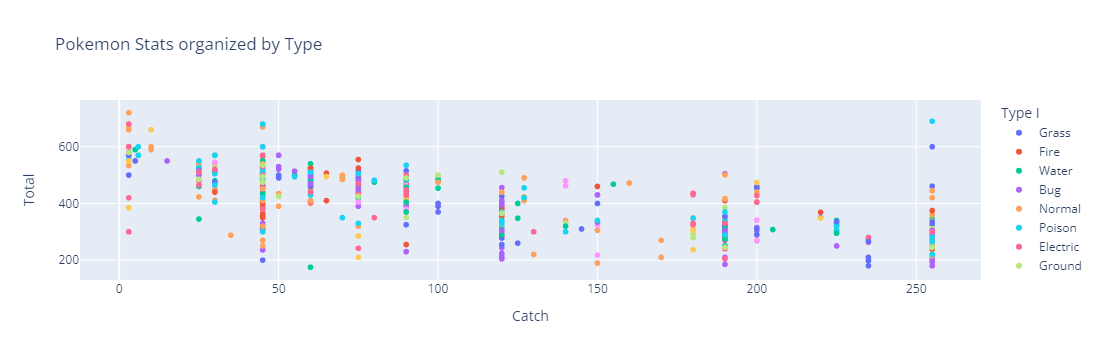

In [35]:
fig = px.scatter(pokemon_tidy, x= 'Catch', y='Total', color='Type I', title= 'Pokemon Stats organized by Type')

fig.show()

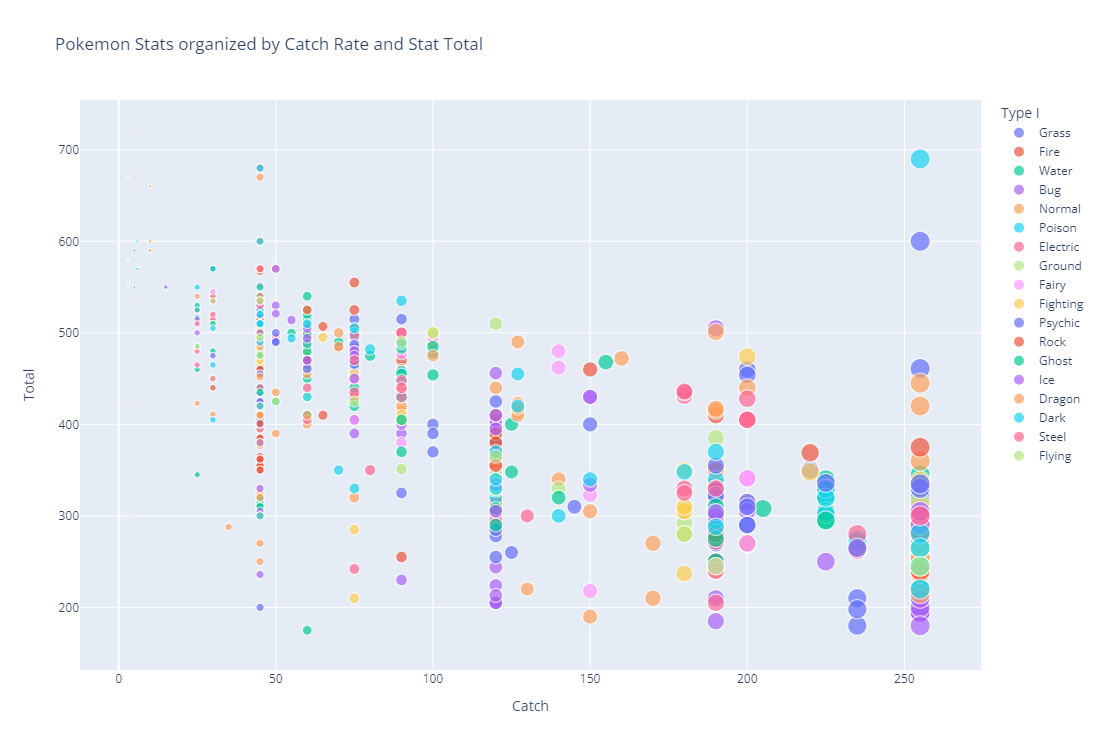

In [36]:
fig = px.scatter(pokemon_tidy, x= 'Catch', y='Total', 
                 color='Type I', 
                 size='Catch', 
                 width= 1000, height = 750, 
                 title= 'Pokemon Stats organized by Catch Rate and Stat Total')
               

fig.show()

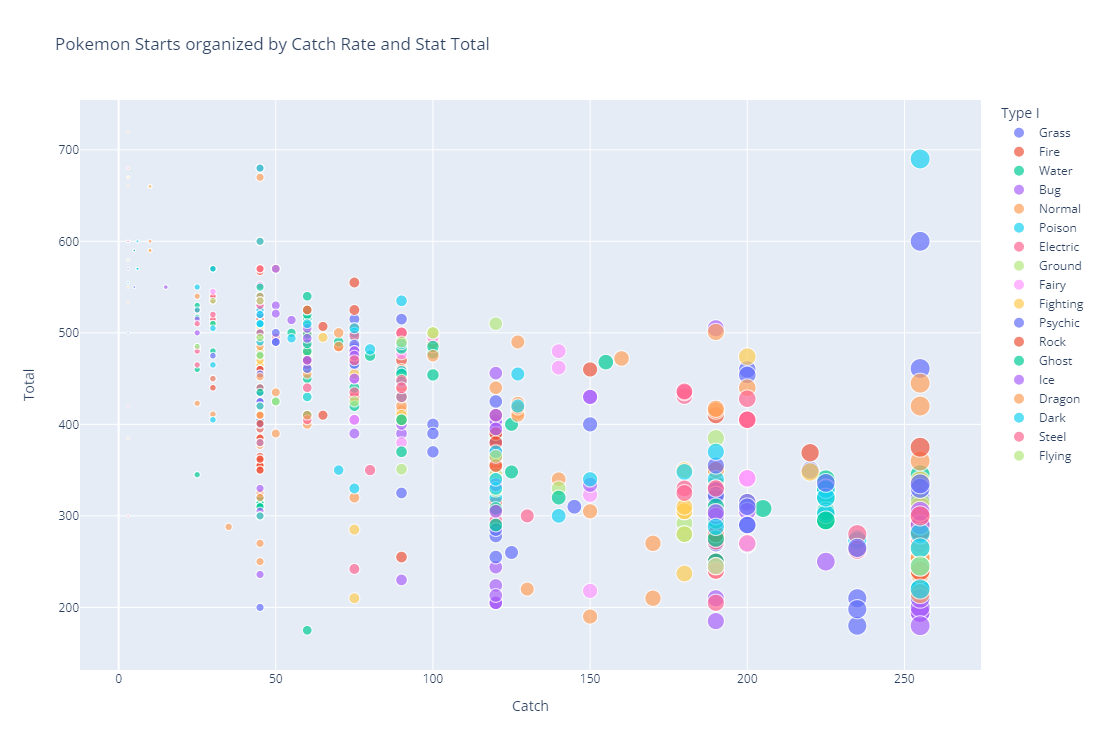

In [37]:
fig = px.scatter(pokemon_tidy, x= 'Catch', y='Total', 
                 color='Type I', 
                 size='Catch', 
                 width= 1000, height = 750, 
                 hover_name= 'Pokemon',
                 title= 'Pokemon Starts organized by Catch Rate and Stat Total')

fig.show()

#  How else you could clean up or enhance the appearance of the graph
- Ensuring that all column names follow a consistent format e.g., lowercase or underscores instead of spaces for easier manipulation.
- Normalize numerical columns if necessary.
- Check for any inconsistencies or errors in the data like misspelt names.


In [26]:
wq = pd.read_csv('wq.csv')
wq.head()

Site_Id   Read_Date  Dissolved Oxygen (mg/L)  pH (standard units)  \
0       A   1/10/2013                      6.9                  6.5   
1       A   1/11/2012                      8.2                  6.5   
2       A   1/14/2014                      6.8                  6.5   
3       A  10/13/2011                      4.0                  6.5   
4       A  10/13/2015                      6.7                  7.0   

   Secchi Depth (m)  Water Depth (m)  Water Temp (?C)  Air Temp (F)  \
0               0.8              0.9              8.0            48   
1               0.9              0.9             12.0            53   
2               0.5              0.5             11.0            53   
3               0.7              0.8             22.0            75   
4               0.4              0.4             15.0            52   

  Time (24:00)  AirTemp (C)  Year  
0        00:00     8.888889  2013  
1        00:00    11.666667  2012  
2        10:20    11.666667  2014  
3        00:00    23.888889  2011  
4        10:35    11.111111  2015

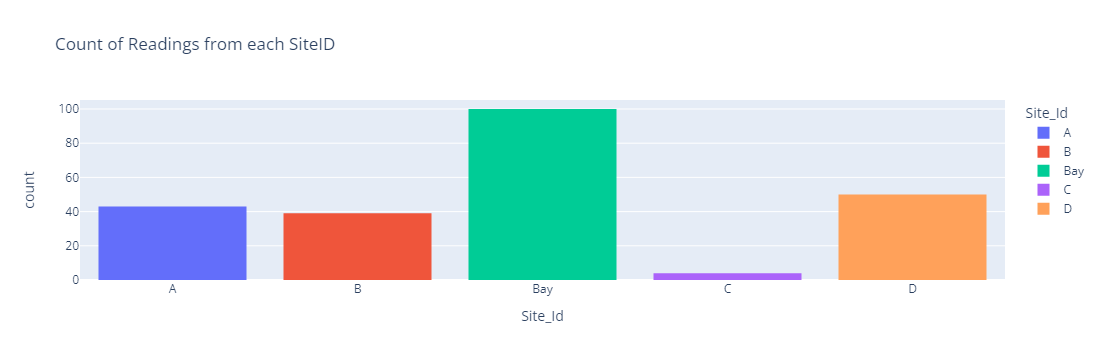

In [39]:
fig= px.histogram(wq, x='Site_Id',\
                 histfunc='count',\
                 color = 'Site_Id',\
                 title= 'Count of Readings from each SiteID')
fig.show()

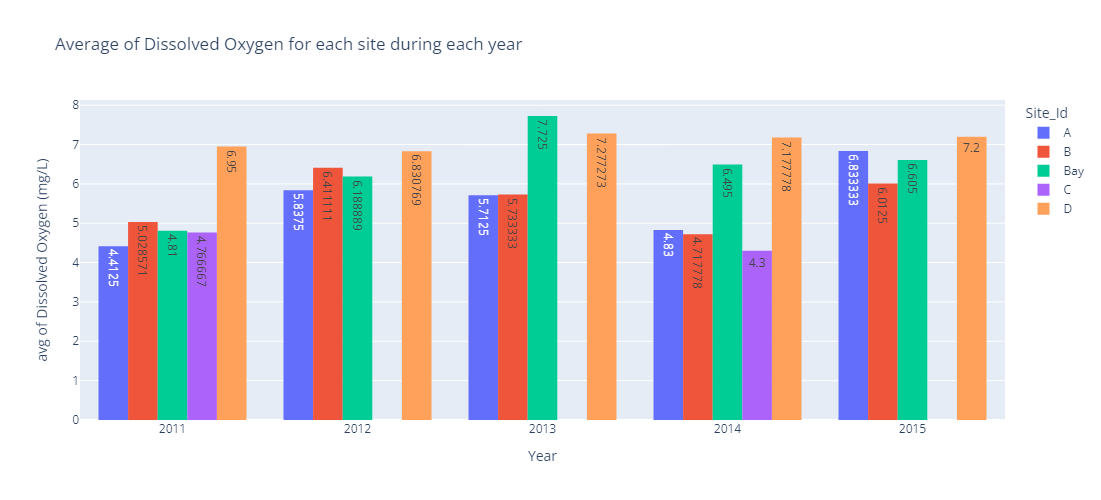

In [41]:
fig= px.histogram(wq, x='Year', y='Dissolved Oxygen (mg/L)',\
color='Site_Id',\
barmode='group',\
histfunc='avg',\
text_auto=True, height=500, title = 'Average of Dissolved Oxygen for each site during each year')

fig.show()


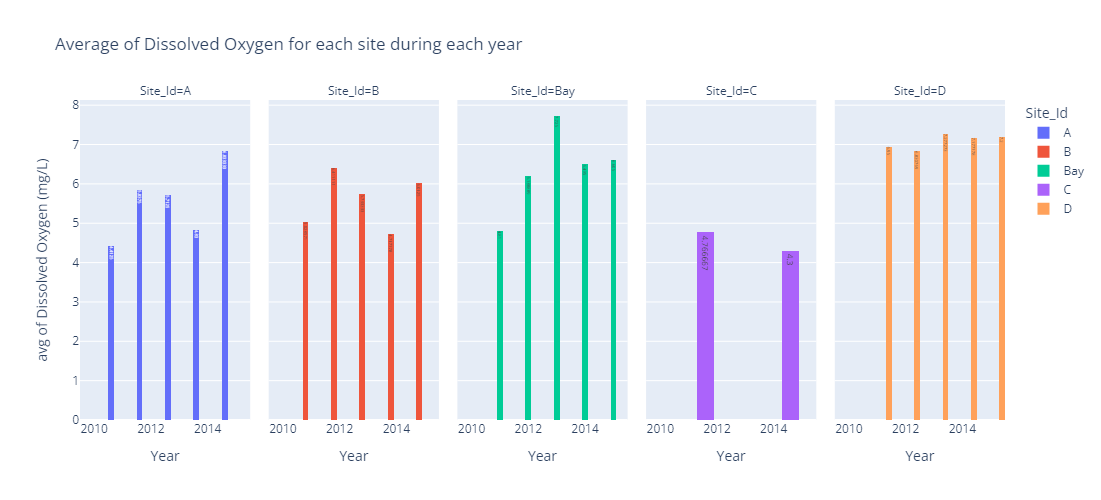

In [42]:
fig = px.histogram(wq, x = 'Year',\
                   y = 'Dissolved Oxygen (mg/L)',\
                   color = 'Site_Id',\
                   barmode = 'group',\
                   histfunc = 'avg',\
                   facet_col = 'Site_Id',\
                   text_auto=True, \
                   height = 500,\
                   title='Average of Dissolved Oxygen for each site during each year')
fig.show()

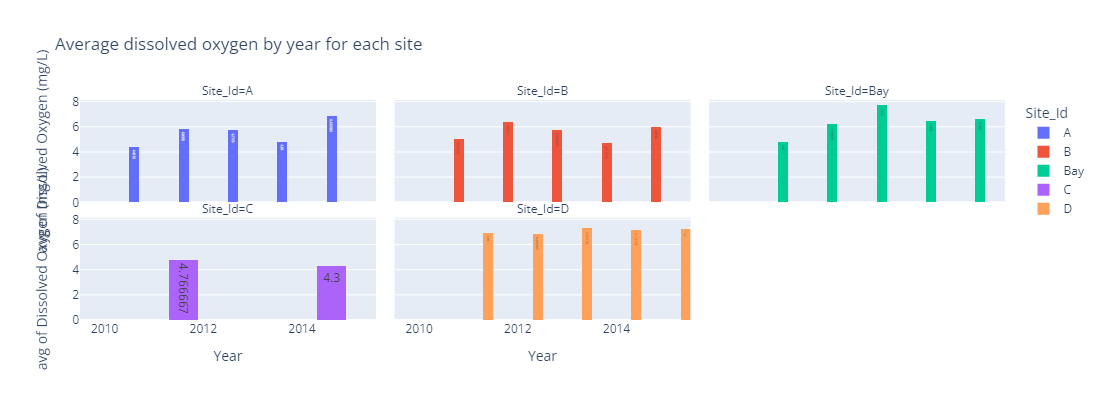

In [48]:
fig = px.histogram(wq, x = 'Year',\
                   y = 'Dissolved Oxygen (mg/L)',\
                   color = 'Site_Id',\
                   barmode = 'group',\
                   histfunc = 'avg',\
                   facet_col = 'Site_Id',\
                   facet_col_wrap = 3,
                   text_auto=True,\
                   height = 500,\
                   title='Average dissolved oxygen by year for each site')
fig.show()

In [49]:
wq['Water Depth (m)'].groupby(wq['Site_Id'])

In [50]:
wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list)

Site_Id
A      [0.9, 0.9, 0.5, 0.8, 0.4, 0.3, 0.7, 0.3, 0.5, ...
B      [0.3, 0.4, 0.05, 0.05, 0.4, 0.1, 0.2, 0.15, 0....
Bay    [0.5, 0.7, 0.6, 0.6, 0.6, 0.4, 0.8, 0.4, 0.45,...
C                                  [0.8, 0.3, 0.17, 1.3]
D      [1.4, 1.4, 1.4, 1.2, 1.5, 0.8, 1.3, 1.2, 1.2, ...
Name: Water Depth (m), dtype: object

In [51]:
len(wq['Site_Id'].unique()) +1

6

In [52]:
wq['Site_Id'].unique()

array(['A', 'B', 'Bay', 'C', 'D'], dtype=object)

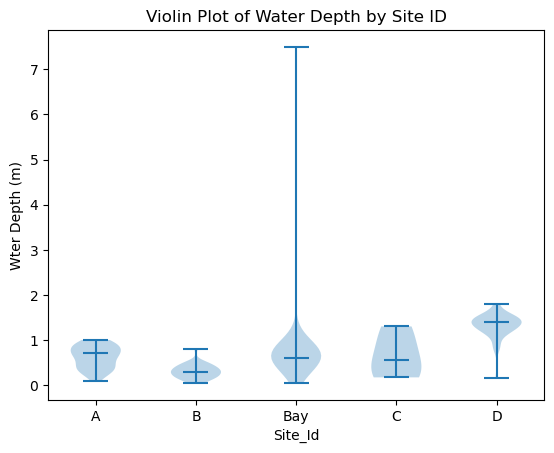

In [53]:
plt.violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), showmeans = False, showmedians = True)
plt.xticks(ticks = range(1, len(wq['Site_Id'].unique()) +1),\
           labels = wq['Site_Id'].unique())

plt.xlabel('Site_Id')
plt.ylabel('Wter Depth (m)')
plt.title('Violin Plot of Water Depth by Site ID')

plt.show()

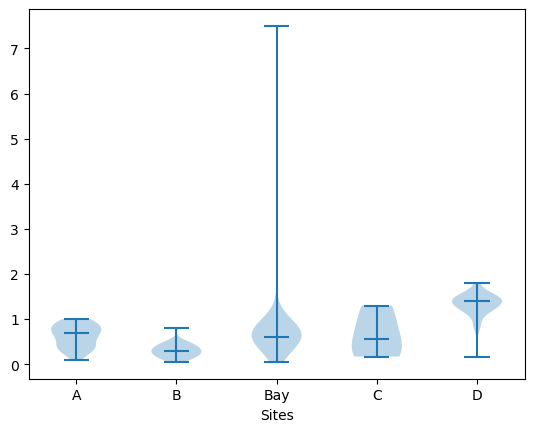

In [54]:
plt.violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), showmeans = False, showmedians = True)
plt.xlabel('Sites')
plt.xticks([1, 2, 3, 4, 5], ['A', 'B', 'Bay', 'C', 'D'])
plt.show()

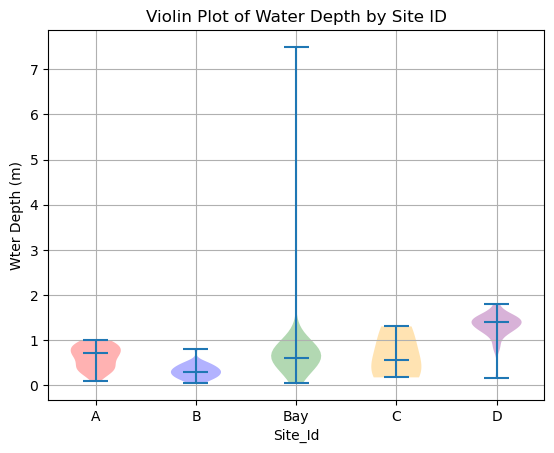

In [72]:
violins = plt.violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), showmeans = False, showmedians = True)
plt.xticks(ticks = range(1, len(wq['Site_Id'].unique()) +1),\
           labels = wq['Site_Id'].unique())

plt.xlabel('Site_Id')
plt.ylabel('Wter Depth (m)')
plt.title('Violin Plot of Water Depth by Site ID')

plt.grid()
#plt.grid(True)
colors = ['red', 'blue', 'green', 'orange', 'purple']

for color, violin in zip(colors, violins['bodies']):
    violin.set_facecolor(color)

plt.show()

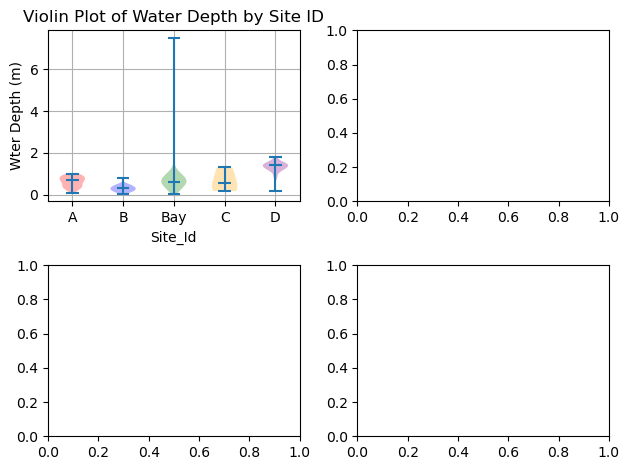

In [71]:
fig, axs = plt.subplots(2, 2)

violins = axs[0,0].violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), showmeans = False, showmedians = True)
axs[0,0].set_xticks(ticks = range(1, len(wq['Site_Id'].unique()) +1),\
           labels = wq['Site_Id'].unique())

axs[0,0].set_xlabel('Site_Id')
axs[0,0].set_ylabel('Wter Depth (m)')
axs[0,0].set_title('Violin Plot of Water Depth by Site ID')

axs[0,0].grid()
#plt.grid(True)
colors = ['red', 'blue', 'green', 'orange', 'purple']

for color, violin in zip(colors, violins['bodies']):
    violin.set_facecolor(color)

plt.tight_layout()
plt.show()

In [31]:
jobs = pd.read_csv('job_in_data.csv')
jobs.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

In [55]:
jobs['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [56]:
jobs['salary_in_usd'].describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

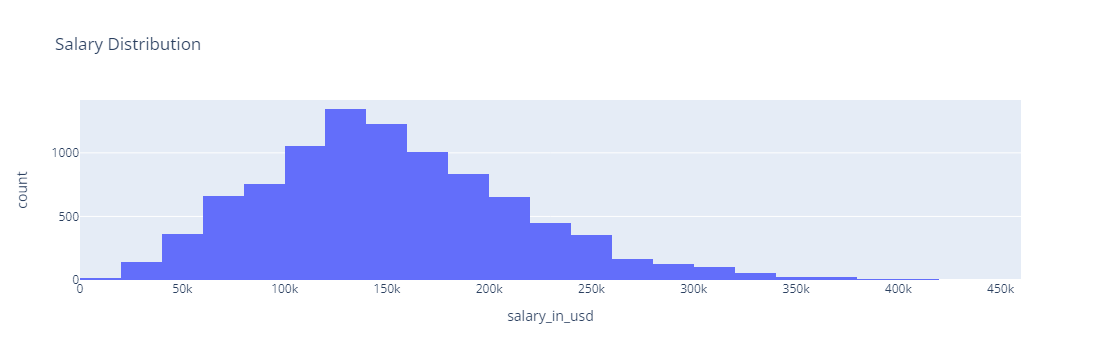

In [57]:
fig = px.histogram(jobs, x='salary_in_usd', nbins=30, title='Salary Distribution')

fig.show()

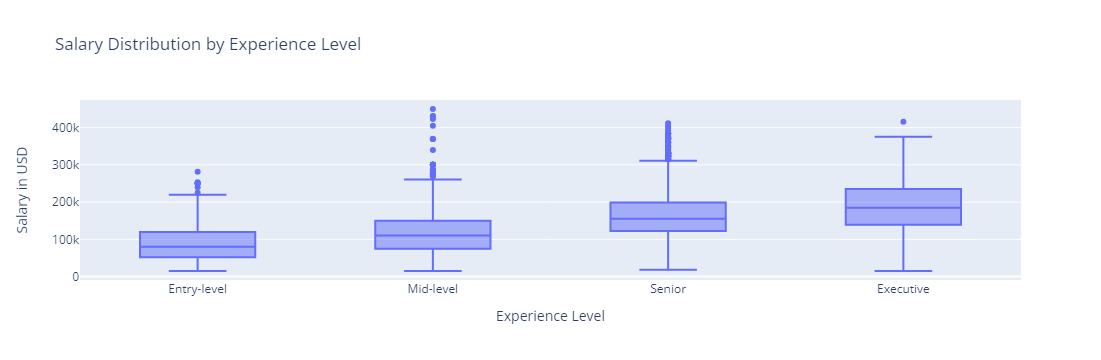

In [33]:
fig = px.box(jobs, x='experience_level', y='salary_in_usd',\
title='Salary Distribution by Experience Level',\
labels={'salary_in_usd': 'Salary in USD', 'experience_level': 'Experience Level'},\
category_orders={"experience_level": ["Entry-level", "Mid-level", "Senior", "Executive"]})

fig.show()

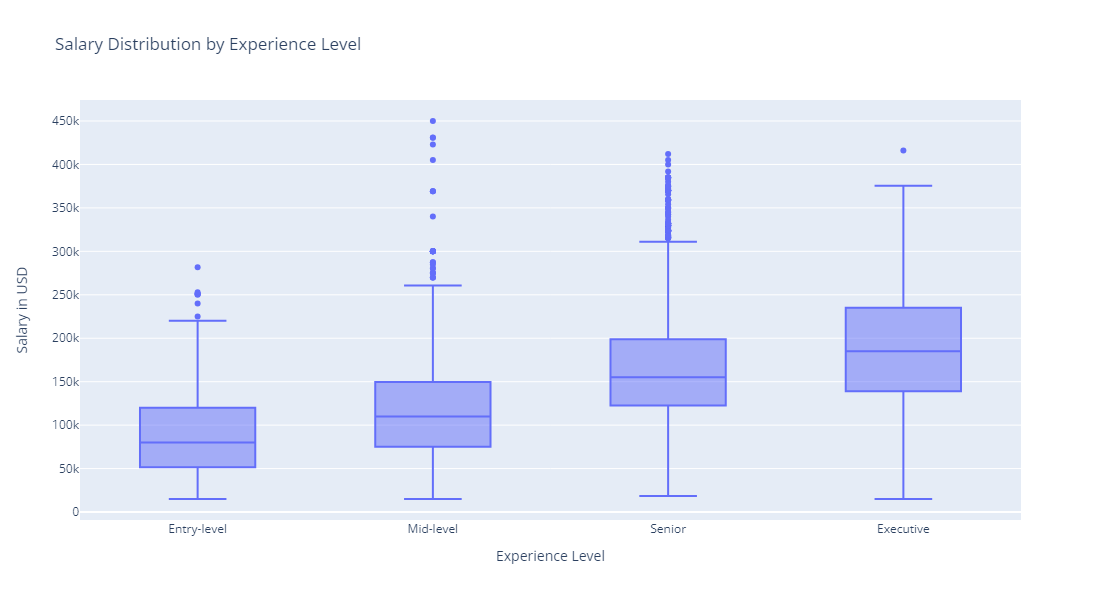

In [61]:
fig = px.box(jobs, x='experience_level', y='salary_in_usd',\
             title='Salary Distribution by Experience Level',\
             height =600,\
             labels={'salary_in_usd': 'Salary in USD', 'experience_level': 'Experience Level'},\
             category_orders={"experience_level": ["Entry-level", "Mid-level", "Senior", "Executive"]}
           )

fig.show()

In [62]:
fig_dict = fig.to_dict()

In [63]:
fig_dict.keys()

dict_keys(['data', 'layout'])

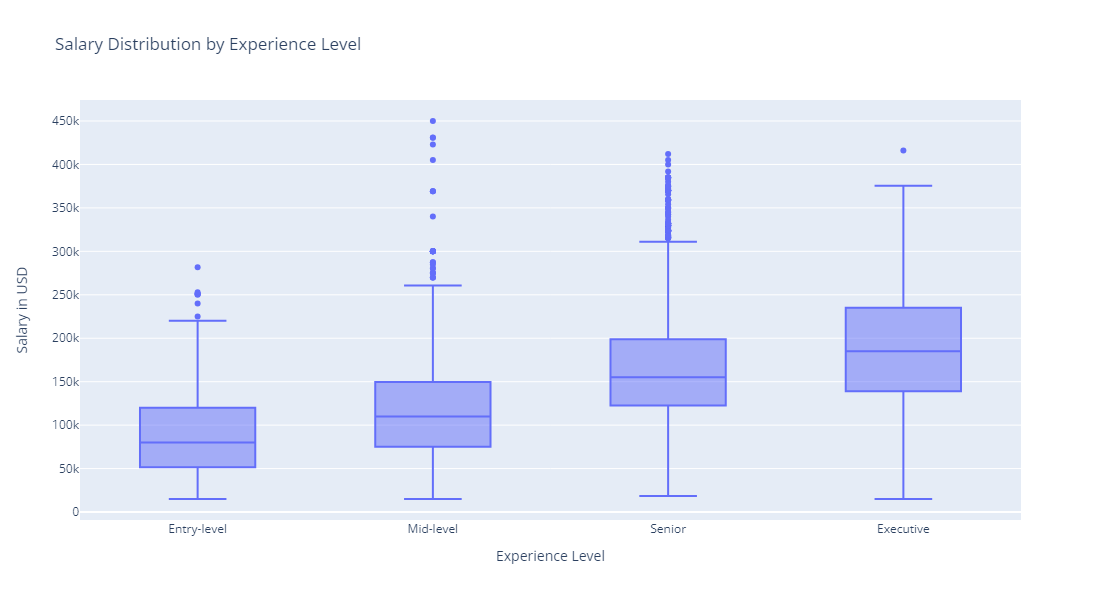

In [64]:
import plotly.io as pio
pio.show(fig_dict)

In [65]:
fig_json = fig.to_json()
fig_json[0:20]

'{"data":[{"alignment'

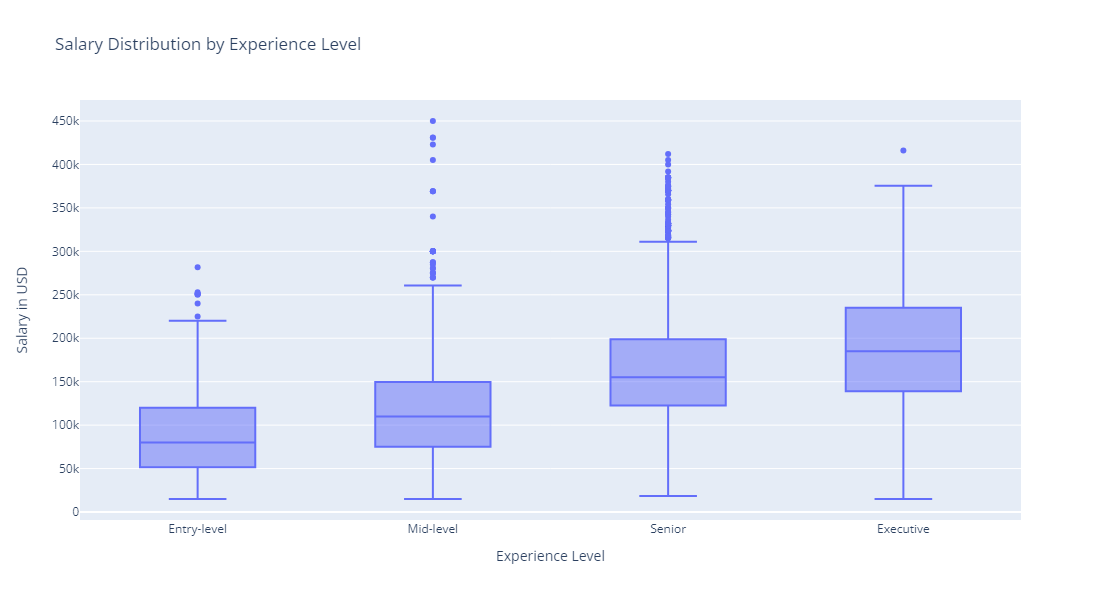

In [66]:
fig_from_json = pio.from_json(fig_json)
fig_from_json.show()

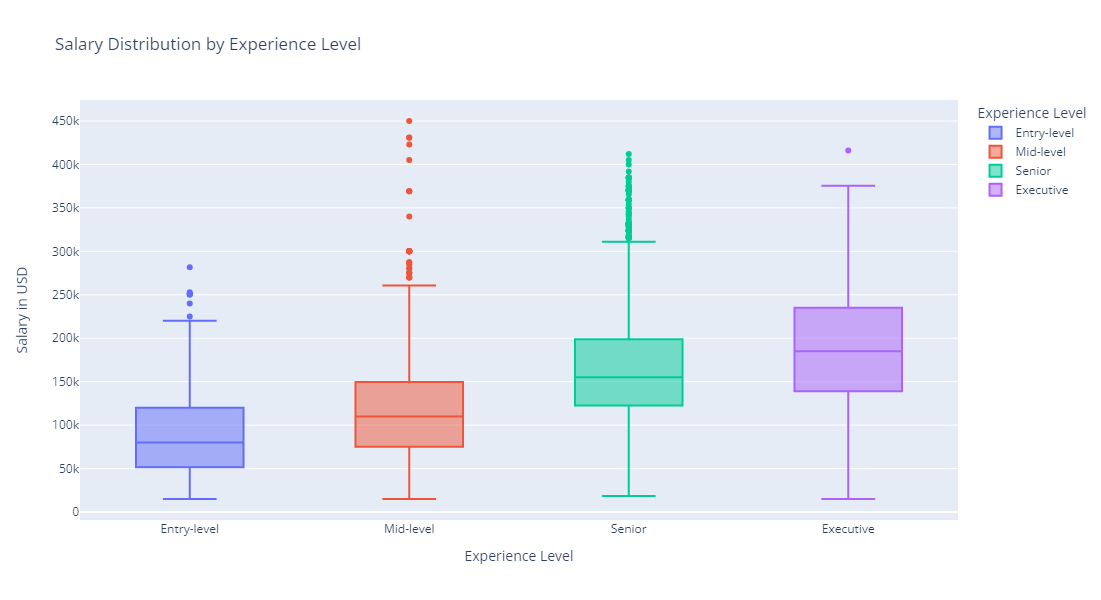

In [68]:
fig1 = px.box(jobs, x='experience_level', y='salary_in_usd',\
              height = 600,\
              color = 'experience_level',\
             title='Salary Distribution by Experience Level',\
             labels={'salary_in_usd': 'Salary in USD', 'experience_level': 'Experience Level'},\
             category_orders={"experience_level": ["Entry-level", "Mid-level", "Senior", "Executive"]},\
             )

fig1.show()

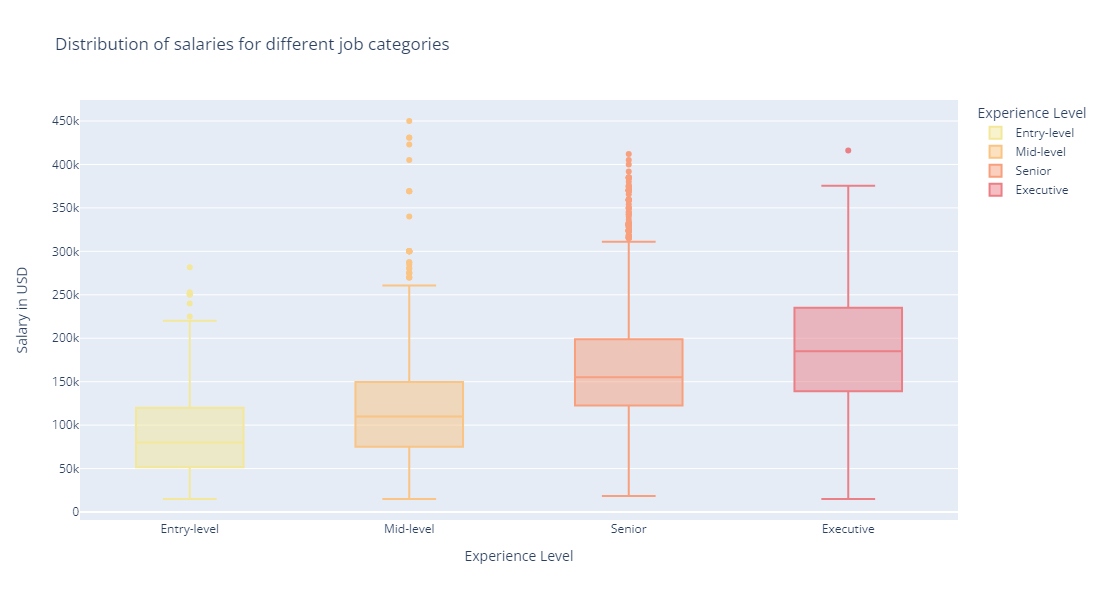

In [70]:
fig2 = px.box(jobs, x='experience_level', y='salary_in_usd',\
              height = 600,\
              color = 'experience_level',\
             color_discrete_sequence = px.colors.sequential.Sunset,\
             title='Distribution of salaries for different job categories',\
             labels={'salary_in_usd': 'Salary in USD', 'experience_level': 'Experience Level'},\
             category_orders={"experience_level": ["Entry-level", "Mid-level", "Senior", "Executive"]},\
             )

fig2.show()

- The box represents the interquartile range of the salary distribution for each experience level category. 
- The plot uses a color gradient to differentiate between different experience levels, making it easier to compare salary distributions across categories visually.
- The line inside the box represents the median salary for each experience level category. 